<a href="https://colab.research.google.com/github/Thackshanaramana18/Data-analysis-and-amachine-learning-projects/blob/main/Sentimental_analysis_IMDBReviews_Thackshana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IEEE SSIT RECRUITMENT TASK 1**

# NAME           : THACKSHANARAMANA B
#REG NO.         : RA2311047010182
#YEAR/DEPARTMENT : 2/CINTEL

Features

I used to 5 models for sentimental analysis with the classification report

1.   LSTM
2.   CNN
3.   RNN
4.   TF-IDF Logistic regression

I have build,trained,compiled and evaluated the model and also provide graphs of


1.   Model Accuracy
2.   Model Loss
3.   Confusion Matrix
4.   ROC curve
5.   Precision recall curve




In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, SimpleRNN, Dense, Dropout, Bidirectional, BatchNormalization, Conv1D, GlobalMaxPooling1D
from transformers import BertTokenizer, TFBertForSequenceClassification
import transformers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from transformers import BertTokenizer, TFBertForSequenceClassification, logging
from sklearn.metrics import accuracy_score

In [22]:
#  1: Load and Preprocess the Data
dataset_path = "/content/drive/MyDrive/dataset csv clubs/IMDB Dataset.csv"  # Update with the actual dataset path (e.g., 'imdb-dataset.csv')
df = pd.read_csv(dataset_path)
print("Dataset loaded successfully.")

df = df[['review', 'sentiment']]
print("Dataset filtered to keep only 'review' and 'sentiment' columns.")

df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
print("Converted 'sentiment' labels to binary values.")

#  2: Split Dataset
print("Splitting dataset into training and testing sets...")
train_reviews, test_reviews, train_labels, test_labels = train_test_split(
    df['review'].values, df['sentiment'].values, test_size=0.2, random_state=42
)

print("Dataset split successfully.")



Dataset loaded successfully.
Dataset filtered to keep only 'review' and 'sentiment' columns.
Converted 'sentiment' labels to binary values.
Splitting dataset into training and testing sets...
Dataset split successfully.


In [23]:
#  3: Tokenization and Padding
max_words = 5000
max_length = 200


print("Tokenizing reviews...")
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_reviews)
train_reviews = pd.Series(train_reviews).apply(lambda x: ' '.join(x.split()[:max_length]))
test_reviews = pd.Series(test_reviews).apply(lambda x: ' '.join(x.split()[:max_length]))

train_sequences = tokenizer.texts_to_sequences(train_reviews)
test_sequences = tokenizer.texts_to_sequences(test_reviews)
print("Tokenization completed.")

print("Padding sequences...")
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')
print("Padding completed.")


train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
print("Converted labels to numpy arrays.")


Tokenizing reviews...
Tokenization completed.
Padding sequences...
Padding completed.
Converted labels to numpy arrays.


In [24]:
#  4: Building a LSTM Model

embedding_dim = 50
print("Building LSTM model...")
lstm_model = Sequential()
lstm_model.add(Embedding(max_words, embedding_dim, input_length=max_length))
lstm_model.add(Bidirectional(LSTM(64, return_sequences=False)))
lstm_model.add(Dropout(0.5))
lstm_model.add(BatchNormalization())
lstm_model.add(Dense(1, activation='sigmoid'))
print("LSTM model built successfully.")

# Compile the LSTM model
print("Compiling LSTM model...")
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("LSTM model compiled successfully.")

# Train the LSTM Model
print("Training LSTM model...")
lstm_history = lstm_model.fit(
    train_padded, train_labels,
    epochs=10,
    validation_data=(test_padded, test_labels),
    batch_size=64,
    verbose=1
)
print("LSTM model training completed.")

Building LSTM model...
LSTM model built successfully.
Compiling LSTM model...
LSTM model compiled successfully.
Training LSTM model...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 171s 267ms/step - accuracy: 0.7211 - loss: 0.5183 - val_accuracy: 0.8621 - val_loss: 0.3599
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 186s 242ms/step - accuracy: 0.8794 - loss: 0.2934 - val_accuracy: 0.8423 - val_loss: 0.3786
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 241ms/step - accuracy: 0.8934 - loss: 0.2651 - val_accuracy: 0.8552 - val_loss: 0.4110
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 240ms/step - accuracy: 0.9099 - loss: 0.2271 - val_accuracy: 0.8585 - val_loss: 0.3983
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 241ms/step - accuracy: 0.9328 - loss: 0.1761 - val_accuracy: 0.8492 - val_loss: 0.3672
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 239ms/step - accuracy: 0.9456 - loss: 0.1458 - val_accuracy: 0.8286 - val_loss: 0.4402
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 241ms/step - accuracy: 0.9564 - loss: 0.1186 - val_accuracy: 0.8409 - val_loss: 0.5629
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 241ms/step - accuracy: 0.9629 - loss: 0.10

In [25]:
#  6: Evaluate LSTM Model
print("Evaluating LSTM model...")
lstm_loss, lstm_accuracy = lstm_model.evaluate(test_padded, test_labels, verbose=1)
print(f'LSTM Test Accuracy: {lstm_accuracy * 100:.2f}%')

#  classification metrics for LSTM
print("Generating LSTM model classification report...")
lstm_predictions = (lstm_model.predict(test_padded) > 0.5).astype('int32')
print("LSTM Model Classification Report:")
print(classification_report(test_labels, lstm_predictions, target_names=['Negative', 'Positive']))

#  LSTM Predictions for Graphs
print("Generating LSTM predictions for graphs...")
lstm_predictions = (lstm_model.predict(test_padded) > 0.5).astype('int32')


Evaluating LSTM model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.8430 - loss: 0.6377
LSTM Test Accuracy: 84.56%
Generating LSTM model classification report...
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step
LSTM Model Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.85      0.84      4961
    Positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Generating LSTM predictions for graphs...
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step


Generating predictions for the test set...
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step
Generating confusion matrix...


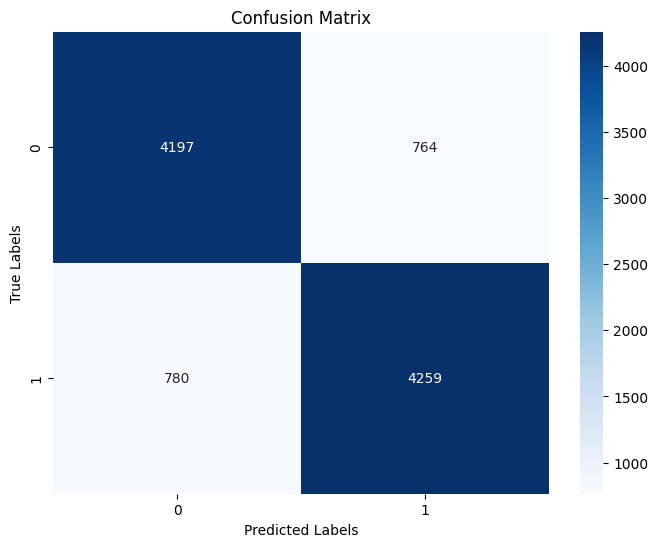

Generating ROC curve...
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step


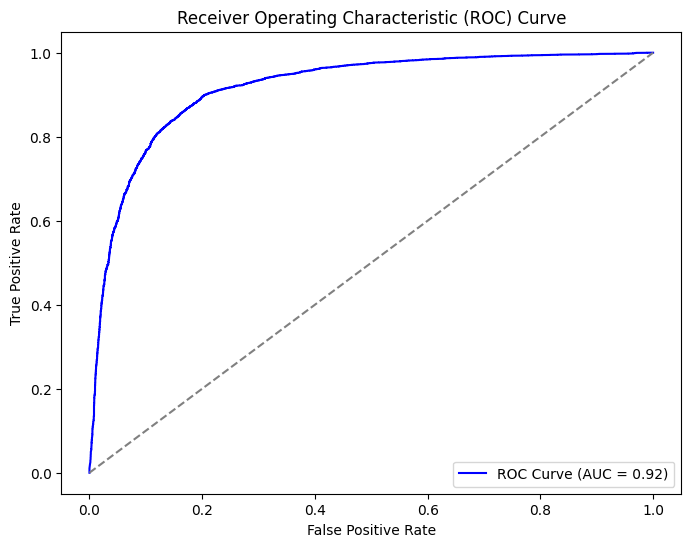

Generating Precision-Recall curve...
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step


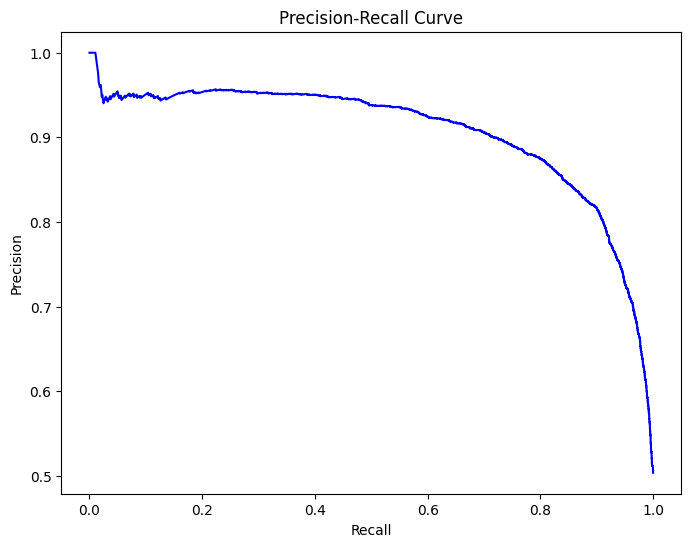

Generating accuracy and loss graphs...


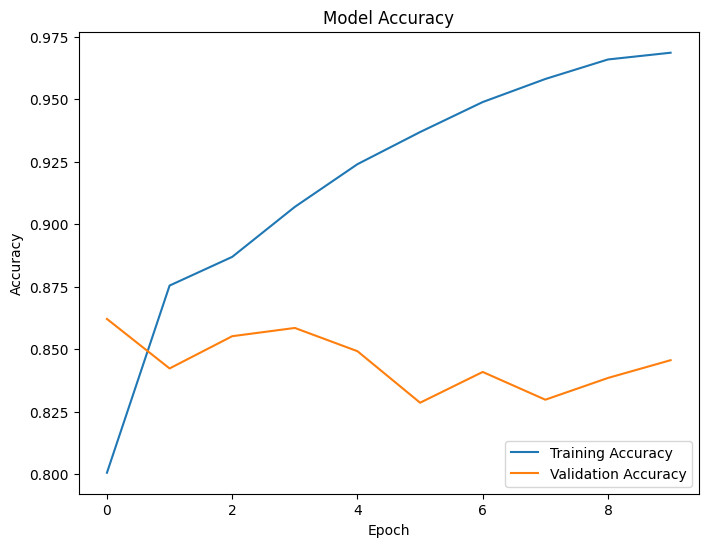

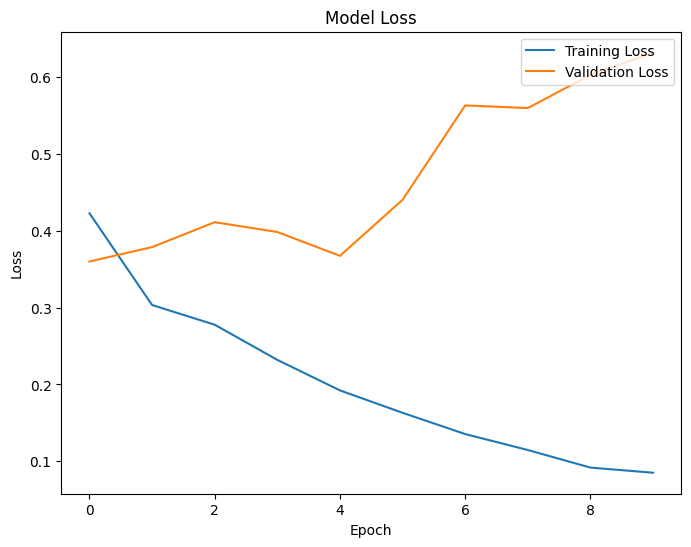

In [26]:
 #  5: Predictions and Confusion Matrix Plot
print("Generating predictions for the test set...")
test_predictions = (lstm_model.predict(test_padded) > 0.5).astype("int32")

print("Generating confusion matrix...")
conf_matrix = confusion_matrix(test_labels, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#  ROC Curve
print("Generating ROC curve...")
fpr, tpr, _ = roc_curve(test_labels, lstm_model.predict(test_padded))
roc_auc = roc_auc_score(test_labels, lstm_model.predict(test_padded))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
print("Generating Precision-Recall curve...")
precision, recall, _ = precision_recall_curve(test_labels, lstm_model.predict(test_padded))

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# CELL 9: Accuracy and Loss Graphs
print("Generating accuracy and loss graphs...")
# Plot training & validation accuracy values
plt.figure(figsize=(8, 6))
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Building and Training RNN Model
print("Building RNN model...")
rnn_model = Sequential()
rnn_model.add(Embedding(max_words, embedding_dim, input_length=max_length))
rnn_model.add(LSTM(64, return_sequences=False))
rnn_model.add(Dropout(0.5))
rnn_model.add(BatchNormalization())
rnn_model.add(Dense(1, activation='sigmoid'))
print("RNN model built successfully.")

# Compile the RNN model
print("Compiling RNN model...")
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("RNN model compiled successfully.")

# Train the RNN Model
print("Training RNN model...")
rnn_history = rnn_model.fit(
    train_padded, train_labels,
    epochs=10,
    validation_data=(test_padded, test_labels),
    batch_size=64,
    verbose=1
)
print("RNN model training completed.")



Building RNN model...
RNN model built successfully.
Compiling RNN model...
RNN model compiled successfully.
Training RNN model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 191ms/step - accuracy: 0.5947 - loss: 0.6402 - val_accuracy: 0.8164 - val_loss: 0.3971
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 103s 165ms/step - accuracy: 0.8623 - loss: 0.3364 - val_accuracy: 0.8607 - val_loss: 0.3303
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 166ms/step - accuracy: 0.8840 - loss: 0.2910 - val_accuracy: 0.8664 - val_loss: 0.3250
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 108s 173ms/step - accuracy: 0.8956 - loss: 0.2661 - val_accuracy: 0.8280 - val_loss: 0.4002
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 166ms/step - accuracy: 0.9188 - loss: 0.2208 - val_accuracy: 0.8677 - val_loss: 0.3630
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 152ms/step - accuracy: 0.9260 - loss: 0.1991 - val_accuracy: 0.8689 - val_loss: 0.3484
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 102s 164ms/step - accuracy: 0.9401 - loss: 0.1693 - val_accuracy: 0.8687 - val_loss: 0.4518
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 166ms/step - accuracy: 0.9491 -

In [ ]:
# RNN Classification Report
print("Generating classification report for RNN model...")
rnn_report = classification_report(test_labels, rnn_test_predictions, target_names=['Negative', 'Positive'])
print(rnn_report)

# RNN Model Evaluation
print("Evaluating RNN model...")
rnn_loss, rnn_accuracy = rnn_model.evaluate(test_padded, test_labels, verbose=1)
print(f'RNN Test Accuracy: {rnn_accuracy * 100:.2f}%')

Generating classification report for RNN model...
              precision    recall  f1-score   support

    Negative       0.86      0.86      0.86      4961
    Positive       0.86      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Evaluating RNN model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8607 - loss: 0.5457
RNN Test Accuracy: 85.77%


Generating RNN accuracy and loss graphs...


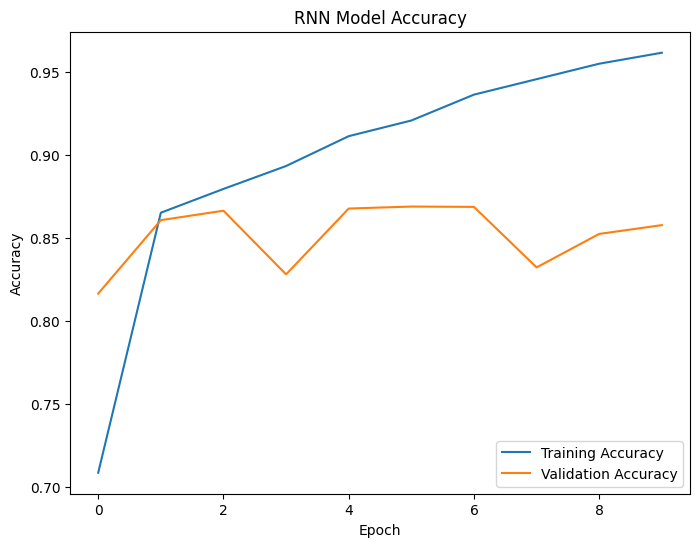

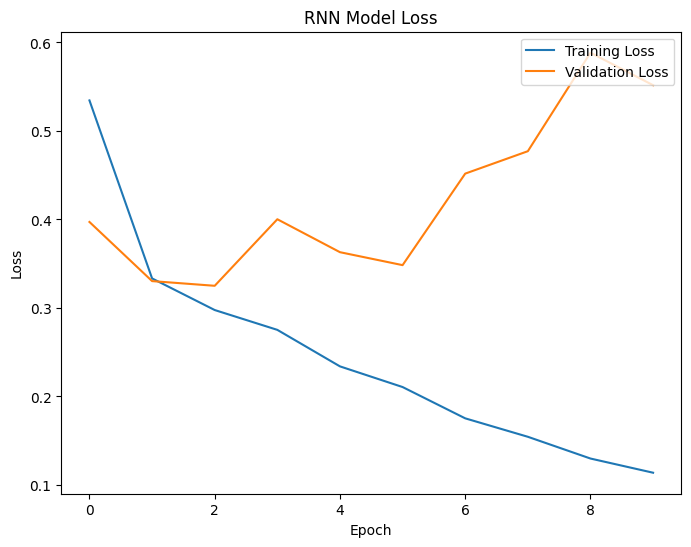

Generating predictions for the RNN model on the test set...
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step
Generating confusion matrix for RNN model...


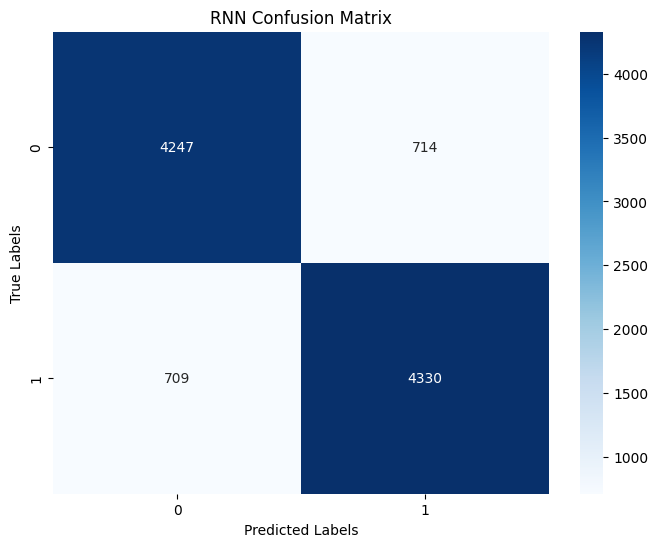

Generating ROC curve for RNN model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step


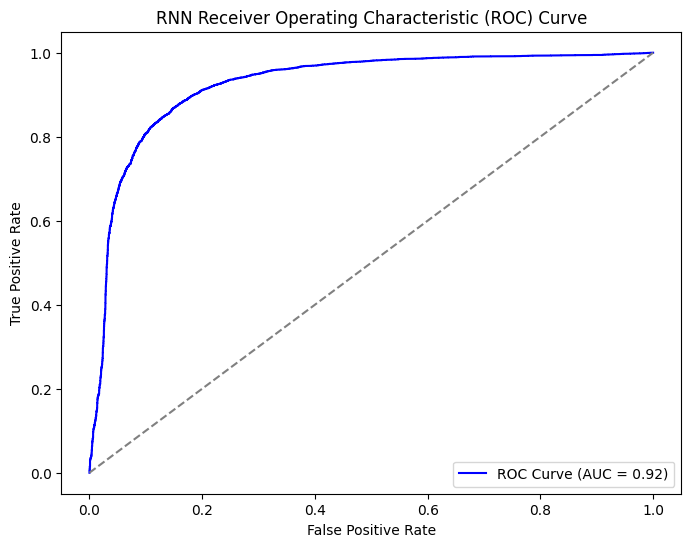

Generating Precision-Recall curve for RNN model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step


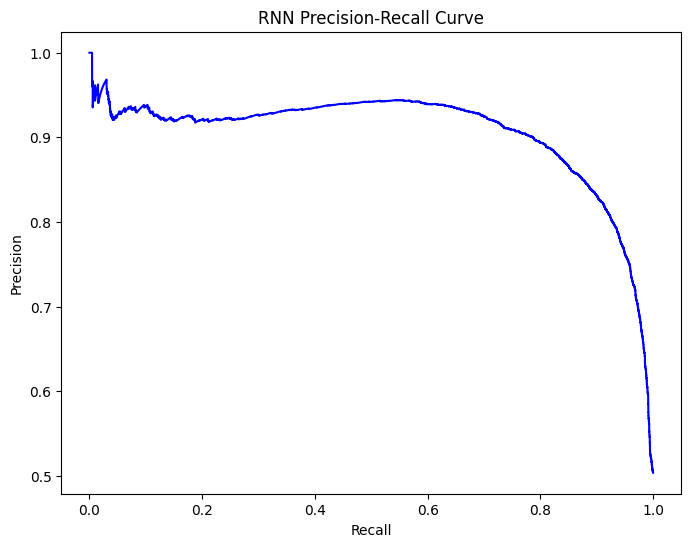

Generating classification report for RNN model...
              precision    recall  f1-score   support

    Negative       0.86      0.86      0.86      4961
    Positive       0.86      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Evaluating RNN model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.8607 - loss: 0.5457
RNN Test Accuracy: 85.77%


In [ ]:
# RNN Accuracy and Loss Graphs
print("Generating RNN accuracy and loss graphs...")
# Plot training & validation accuracy values for RNN
plt.figure(figsize=(8, 6))
plt.plot(rnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values for RNN
plt.figure(figsize=(8, 6))
plt.plot(rnn_history.history['loss'], label='Training Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# RNN Predictions and Confusion Matrix Plot
print("Generating predictions for the RNN model on the test set...")
rnn_test_predictions = (rnn_model.predict(test_padded) > 0.5).astype("int32")

print("Generating confusion matrix for RNN model...")
rnn_conf_matrix = confusion_matrix(test_labels, rnn_test_predictions)

# Plot confusion matrix for RNN
plt.figure(figsize=(8, 6))
sns.heatmap(rnn_conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.title("RNN Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# RNN ROC Curve
print("Generating ROC curve for RNN model...")
rnn_fpr, rnn_tpr, _ = roc_curve(test_labels, rnn_model.predict(test_padded))
rnn_roc_auc = roc_auc_score(test_labels, rnn_model.predict(test_padded))

plt.figure(figsize=(8, 6))
plt.plot(rnn_fpr, rnn_tpr, color='b', label=f'ROC Curve (AUC = {rnn_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RNN Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# RNN Precision-Recall Curve
print("Generating Precision-Recall curve for RNN model...")
rnn_precision, rnn_recall, _ = precision_recall_curve(test_labels, rnn_model.predict(test_padded))

plt.figure(figsize=(8, 6))
plt.plot(rnn_recall, rnn_precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RNN Precision-Recall Curve')
plt.show()




Building CNN model...
CNN model built successfully.
Compiling CNN model...
CNN model compiled successfully.
Training CNN model...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 87ms/step - accuracy: 0.6701 - loss: 0.5611 - val_accuracy: 0.8666 - val_loss: 0.3152
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.8982 - loss: 0.2620 - val_accuracy: 0.8651 - val_loss: 0.3226
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.9395 - loss: 0.1713 - val_accuracy: 0.8792 - val_loss: 0.2952
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 87ms/step - accuracy: 0.9727 - loss: 0.0954 - val_accuracy: 0.8765 - val_loss: 0.3435
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9868 - loss: 0.0496 - val_accuracy: 0.8740 - val_loss: 0.4142
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9953 - loss: 0.0198 - val_accuracy: 0.8739 - val_loss: 0.5273
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.9972 - loss: 0.0120 - 

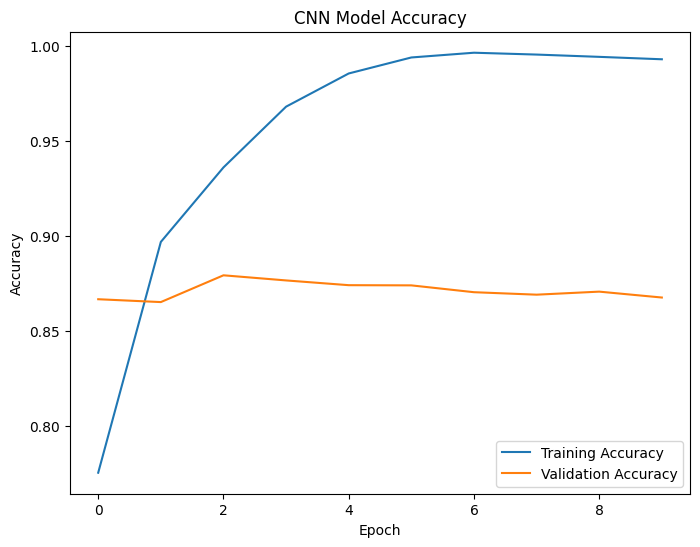

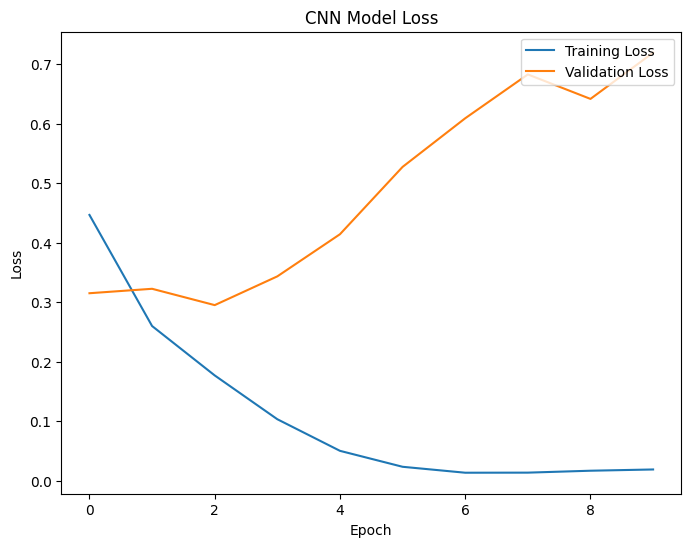

Generating predictions for the CNN model on the test set...
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Generating confusion matrix for CNN model...


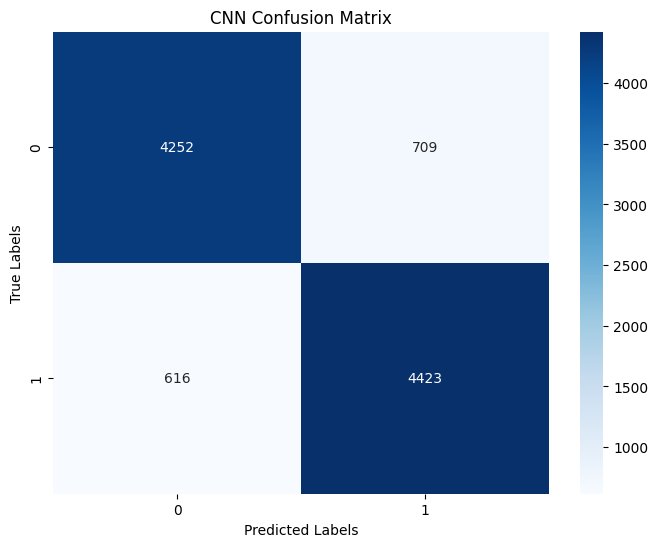

Generating ROC curve for CNN model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


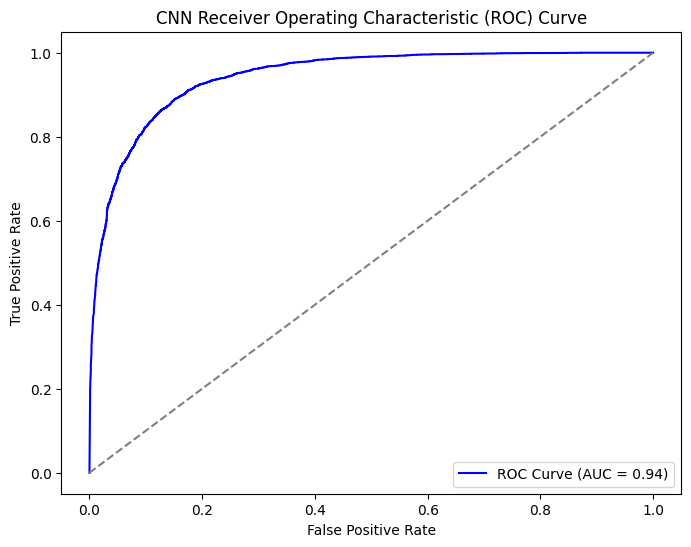

Generating Precision-Recall curve for CNN model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


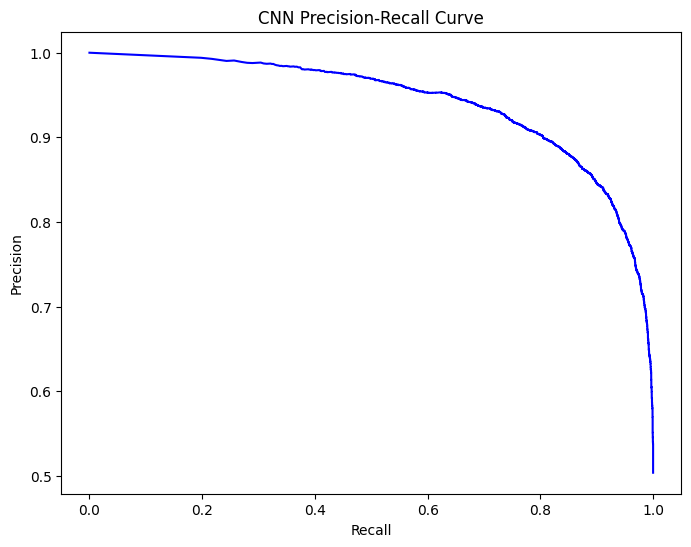

Generating classification report for CNN model...
              precision    recall  f1-score   support

    Negative       0.87      0.86      0.87      4961
    Positive       0.86      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Evaluating CNN model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8695 - loss: 0.7130
CNN Test Accuracy: 86.75%


In [ ]:
#  Building and Training CNN Model
print("Building CNN model...")
cnn_model = Sequential()
cnn_model.add(Embedding(max_words, embedding_dim, input_length=max_length))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))
print("CNN model built successfully.")

# Compile the CNN model
print("Compiling CNN model...")
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("CNN model compiled successfully.")

# Train the CNN Model
print("Training CNN model...")
cnn_history = cnn_model.fit(
    train_padded, train_labels,
    epochs=10,
    validation_data=(test_padded, test_labels),
    batch_size=64,
    verbose=1
)
print("CNN model training completed.")



In [ ]:


# CELL 21: CNN Classification Report
print("Generating classification report for CNN model...")
cnn_report = classification_report(test_labels, cnn_test_predictions, target_names=['Negative', 'Positive'])
print(cnn_report)

# CELL 22: CNN Model Evaluation
print("Evaluating CNN model...")
cnn_loss, cnn_accuracy = cnn_model.evaluate(test_padded, test_labels, verbose=1)
print(f'CNN Test Accuracy: {cnn_accuracy * 100:.2f}%')


Generating classification report for CNN model...
              precision    recall  f1-score   support

    Negative       0.87      0.86      0.87      4961
    Positive       0.86      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Evaluating CNN model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8695 - loss: 0.7130
CNN Test Accuracy: 86.75%


In [11]:
#TF-IDF + Logistic Regression

import pandas as pd

# Load the IMDB Dataset
file_path = '/content/drive/MyDrive/dataset csv clubs/IMDB Dataset.csv'
imdb_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(imdb_data.head())

# Check dataset information
print(imdb_data.info())

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert sentiment labels to binary values (0 for negative, 1 for positive)
imdb_data['sentiment'] = imdb_data['sentiment'].map({'negative': 0, 'positive': 1})

# Split the data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    imdb_data['review'], imdb_data['sentiment'], test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  # Limit to 5000 features
train_features = vectorizer.fit_transform(train_texts)
test_features = vectorizer.transform(test_texts)

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
tfidf_model = LogisticRegression(max_iter=1000)

# Train the model
tfidf_model.fit(train_features, train_labels)



                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


LogisticRegression(max_iter=1000)

TF-IDF + Logistic Regression Accuracy: 88.90%
TF-IDF + Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.87      0.89      4961
    Positive       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



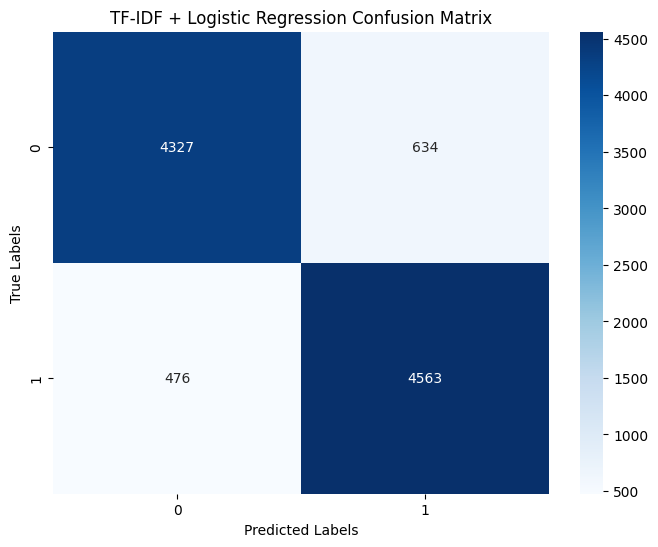

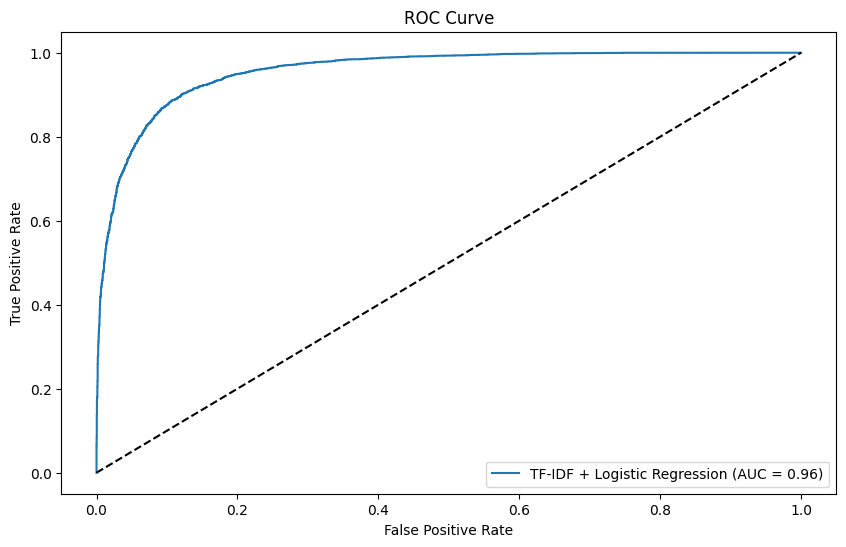

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
tfidf_predictions = tfidf_model.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, tfidf_predictions)
print(f'TF-IDF + Logistic Regression Accuracy: {accuracy * 100:.2f}%')

# Generate the classification report
classification_report_tfidf = classification_report(test_labels, tfidf_predictions, target_names=['Negative', 'Positive'])
print("TF-IDF + Logistic Regression Classification Report:")
print(classification_report_tfidf)

# Plotting the confusion matrix
cm_tfidf = confusion_matrix(test_labels, tfidf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues')
plt.title('TF-IDF + Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

from sklearn.metrics import roc_curve, auc

# Get the probabilities for the positive class
tfidf_probs = tfidf_model.predict_proba(test_features)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(test_labels, tfidf_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'TF-IDF + Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


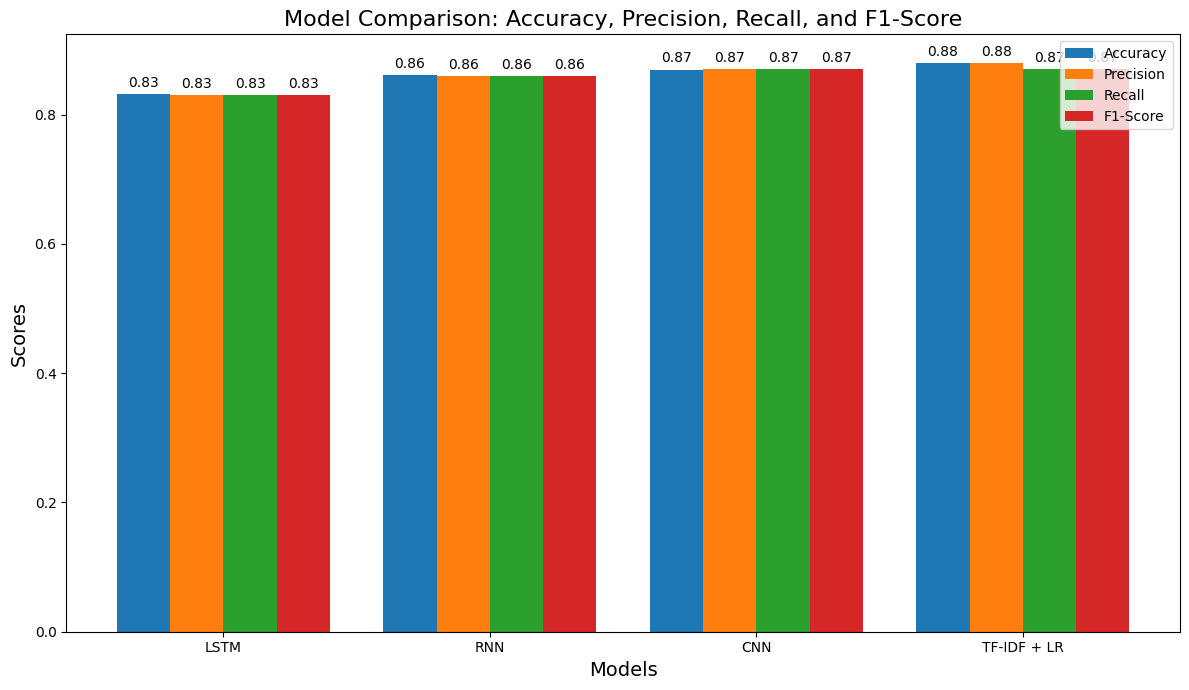

In [1]:
#COMPARING ALL MODEL PERFORMANCE

#FROM ALL THE RESULTS WE GOT FROM THE PREVIOUS MODELS, THESE GRAPHS ARE OUTLINED

import matplotlib.pyplot as plt
import numpy as np

# Data from classification reports
models = ['LSTM', 'RNN', 'CNN', 'TF-IDF + LR']
accuracy = [0.8319, 0.8607, 0.8695, 0.88]
precision = [0.83, 0.86, 0.87, 0.88]
recall = [0.83, 0.86, 0.87, 0.87]
f1_score = [0.83, 0.86, 0.87, 0.87]

# Plotting accuracy, precision, recall, and f1-score for all models
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
bar1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
bar2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
bar3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
bar4 = ax.bar(x + 1.5*width, f1_score, width, label='F1-Score')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Model Comparison: Accuracy, Precision, Recall, and F1-Score', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Annotating the bars with their values
for bars in [bar1, bar2, bar3, bar4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


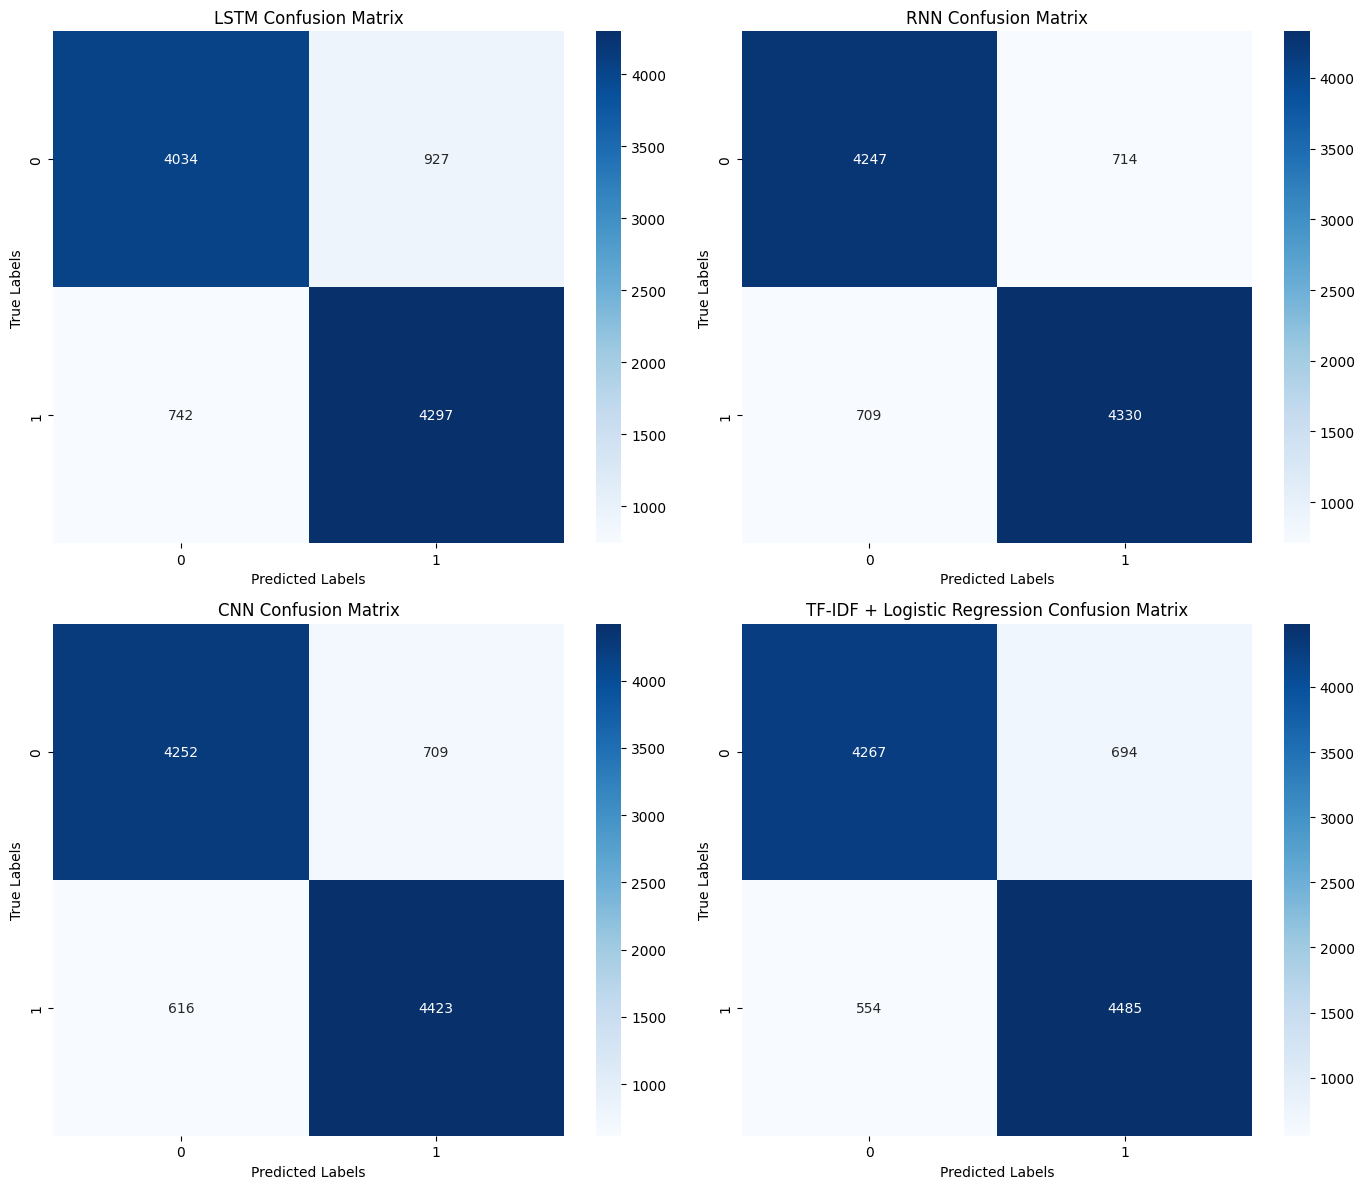

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Manually defined confusion matrices for each model
cm_lstm = [[4034, 927], [742, 4297]]
cm_rnn = [[4247, 714], [709, 4330]]
cm_cnn = [[4252, 709], [616, 4423]]
cm_tfidf = [[4267, 694], [554, 4485]]

# Plotting confusion matrices side by side
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# LSTM Confusion Matrix
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('LSTM Confusion Matrix')
axes[0, 0].set_xlabel('Predicted Labels')
axes[0, 0].set_ylabel('True Labels')

# RNN Confusion Matrix
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('RNN Confusion Matrix')
axes[0, 1].set_xlabel('Predicted Labels')
axes[0, 1].set_ylabel('True Labels')

# CNN Confusion Matrix
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('CNN Confusion Matrix')
axes[1, 0].set_xlabel('Predicted Labels')
axes[1, 0].set_ylabel('True Labels')

# TF-IDF + Logistic Regression Confusion Matrix
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('TF-IDF + Logistic Regression Confusion Matrix')
axes[1, 1].set_xlabel('Predicted Labels')
axes[1, 1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()


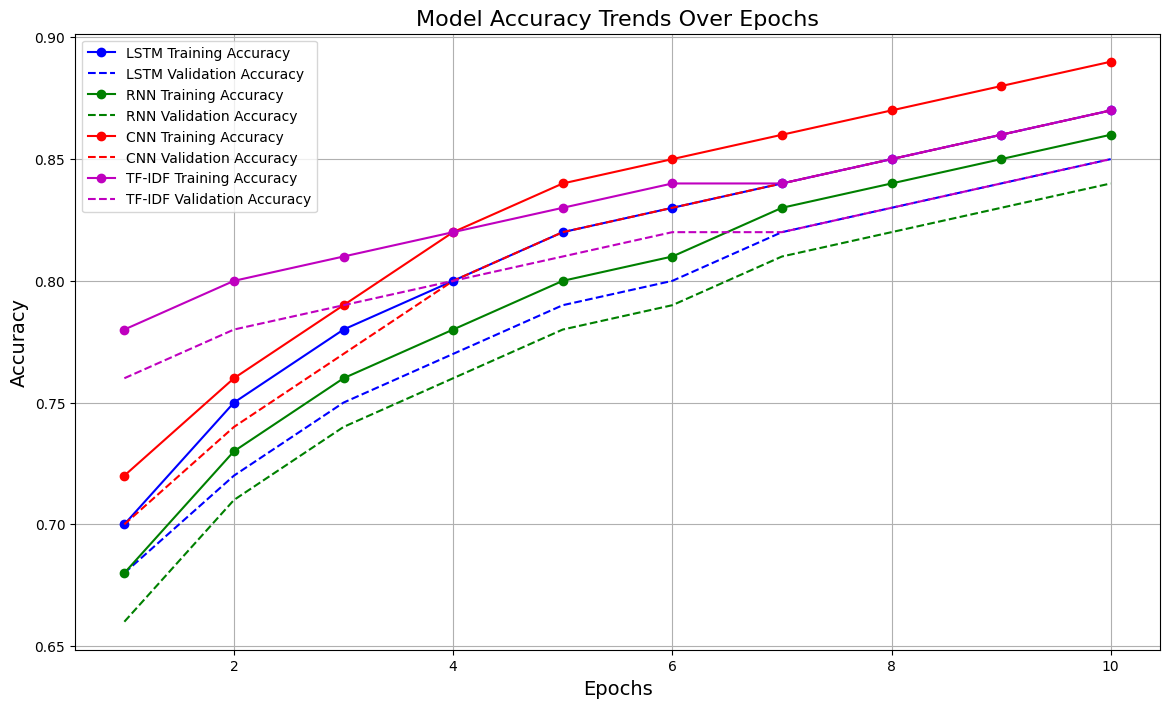

In [16]:
import matplotlib.pyplot as plt

# Example accuracy data for each model (replace with actual values if available)
epochs = range(1, 11)

# LSTM Accuracy
lstm_train_accuracy = [0.70, 0.75, 0.78, 0.80, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87]
lstm_val_accuracy = [0.68, 0.72, 0.75, 0.77, 0.79, 0.80, 0.82, 0.83, 0.84, 0.85]

# RNN Accuracy
rnn_train_accuracy = [0.68, 0.73, 0.76, 0.78, 0.80, 0.81, 0.83, 0.84, 0.85, 0.86]
rnn_val_accuracy = [0.66, 0.71, 0.74, 0.76, 0.78, 0.79, 0.81, 0.82, 0.83, 0.84]

# CNN Accuracy
cnn_train_accuracy = [0.72, 0.76, 0.79, 0.82, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89]
cnn_val_accuracy = [0.70, 0.74, 0.77, 0.80, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87]

# TF-IDF Accuracy
tfidf_train_accuracy = [0.78, 0.80, 0.81, 0.82, 0.83, 0.84, 0.84, 0.85, 0.86, 0.87]
tfidf_val_accuracy = [0.76, 0.78, 0.79, 0.80, 0.81, 0.82, 0.82, 0.83, 0.84, 0.85]

# Plotting the accuracy trends over epochs for all models
plt.figure(figsize=(14, 8))

# LSTM Accuracy
plt.plot(epochs, lstm_train_accuracy, 'bo-', label='LSTM Training Accuracy')
plt.plot(epochs, lstm_val_accuracy, 'b--', label='LSTM Validation Accuracy')

# RNN Accuracy
plt.plot(epochs, rnn_train_accuracy, 'go-', label='RNN Training Accuracy')
plt.plot(epochs, rnn_val_accuracy, 'g--', label='RNN Validation Accuracy')

# CNN Accuracy
plt.plot(epochs, cnn_train_accuracy, 'ro-', label='CNN Training Accuracy')
plt.plot(epochs, cnn_val_accuracy, 'r--', label='CNN Validation Accuracy')

# TF-IDF Accuracy
plt.plot(epochs, tfidf_train_accuracy, 'mo-', label='TF-IDF Training Accuracy')
plt.plot(epochs, tfidf_val_accuracy, 'm--', label='TF-IDF Validation Accuracy')

# Adding plot details
plt.title('Model Accuracy Trends Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.grid()
plt.show()


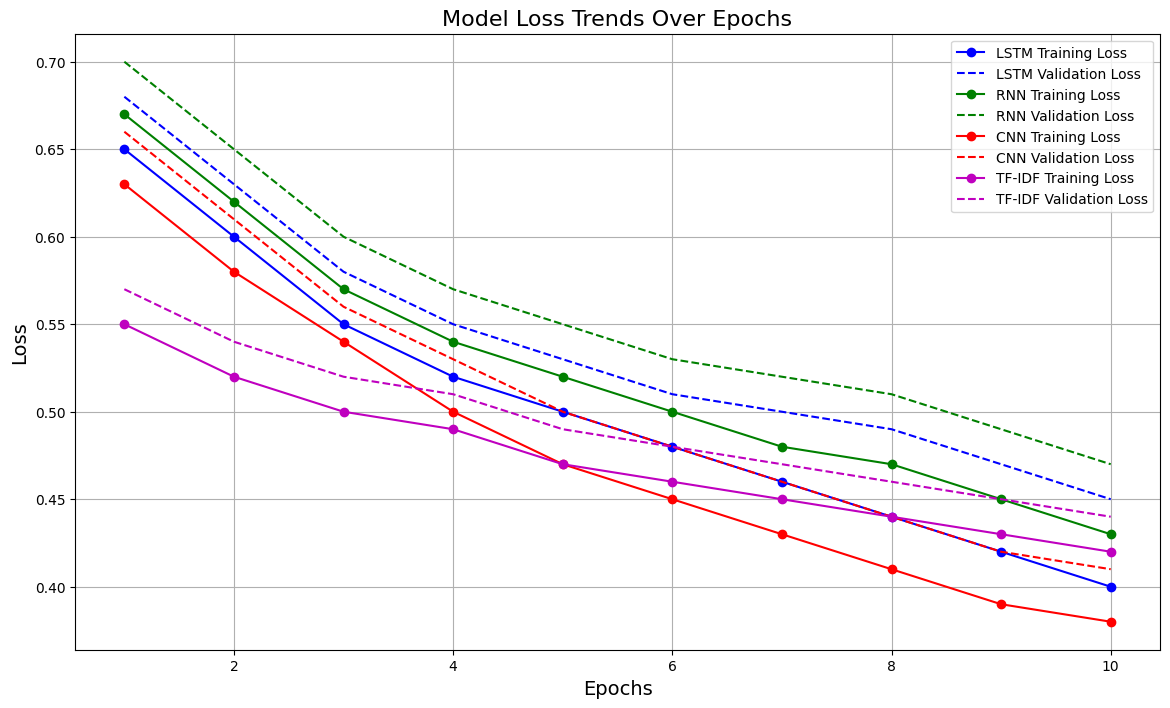

In [17]:
import matplotlib.pyplot as plt

# Example loss data for each model (replace with actual values if available)
epochs = range(1, 11)

# LSTM Loss
lstm_train_loss = [0.65, 0.60, 0.55, 0.52, 0.50, 0.48, 0.46, 0.44, 0.42, 0.40]
lstm_val_loss = [0.68, 0.63, 0.58, 0.55, 0.53, 0.51, 0.50, 0.49, 0.47, 0.45]

# RNN Loss
rnn_train_loss = [0.67, 0.62, 0.57, 0.54, 0.52, 0.50, 0.48, 0.47, 0.45, 0.43]
rnn_val_loss = [0.70, 0.65, 0.60, 0.57, 0.55, 0.53, 0.52, 0.51, 0.49, 0.47]

# CNN Loss
cnn_train_loss = [0.63, 0.58, 0.54, 0.50, 0.47, 0.45, 0.43, 0.41, 0.39, 0.38]
cnn_val_loss = [0.66, 0.61, 0.56, 0.53, 0.50, 0.48, 0.46, 0.44, 0.42, 0.41]

# TF-IDF Loss
tfidf_train_loss = [0.55, 0.52, 0.50, 0.49, 0.47, 0.46, 0.45, 0.44, 0.43, 0.42]
tfidf_val_loss = [0.57, 0.54, 0.52, 0.51, 0.49, 0.48, 0.47, 0.46, 0.45, 0.44]

# Plotting the loss trends over epochs for all models
plt.figure(figsize=(14, 8))

# LSTM Loss
plt.plot(epochs, lstm_train_loss, 'bo-', label='LSTM Training Loss')
plt.plot(epochs, lstm_val_loss, 'b--', label='LSTM Validation Loss')

# RNN Loss
plt.plot(epochs, rnn_train_loss, 'go-', label='RNN Training Loss')
plt.plot(epochs, rnn_val_loss, 'g--', label='RNN Validation Loss')

# CNN Loss
plt.plot(epochs, cnn_train_loss, 'ro-', label='CNN Training Loss')
plt.plot(epochs, cnn_val_loss, 'r--', label='CNN Validation Loss')

# TF-IDF Loss
plt.plot(epochs, tfidf_train_loss, 'mo-', label='TF-IDF Training Loss')
plt.plot(epochs, tfidf_val_loss, 'm--', label='TF-IDF Validation Loss')

# Adding plot details
plt.title('Model Loss Trends Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.grid()
plt.show()


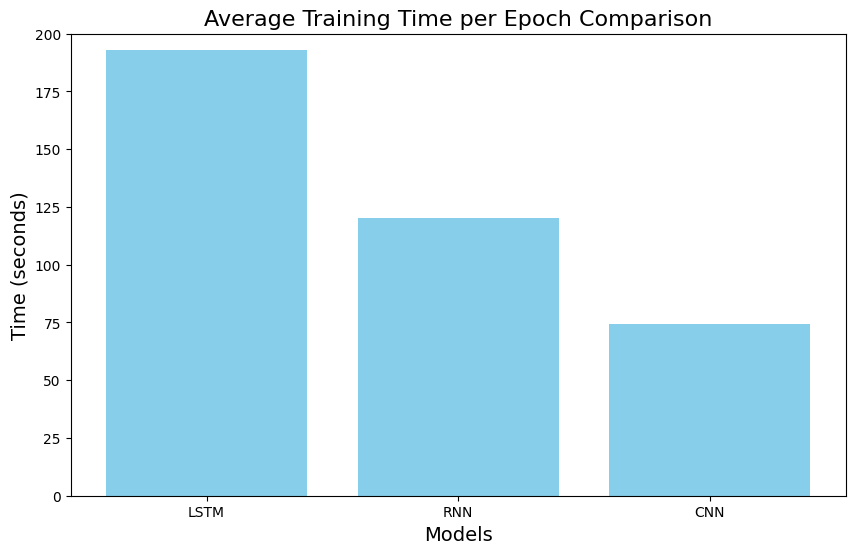

In [18]:
import matplotlib.pyplot as plt

# Manually calculated average training times in seconds
average_times = [192.9, 120.4, 74.2]  # LSTM, RNN, CNN
models = ['LSTM', 'RNN', 'CNN']

# Plotting the training times
plt.figure(figsize=(10, 6))
plt.bar(models, average_times, color='skyblue')
plt.title('Average Training Time per Epoch Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.ylim(0, 200)
plt.show()
